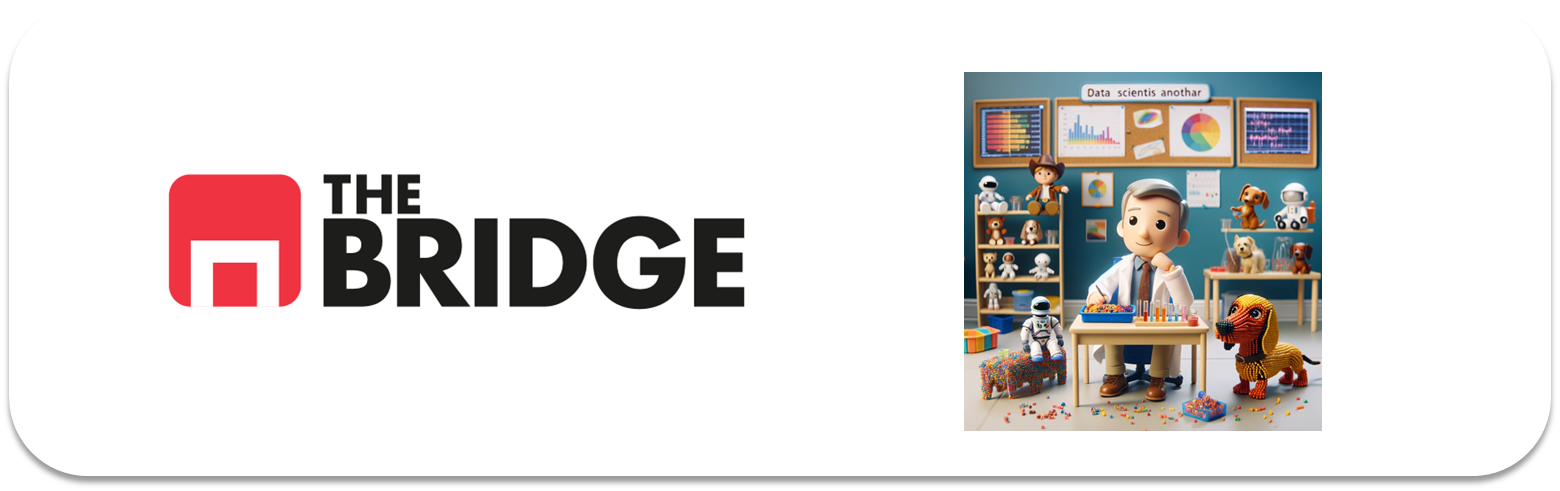

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import (
    pinta_distribucion_categoricas,
    plot_categorical_relationship_fin,
    plot_categorical_numerical_relationship,
    plot_combined_graphs,
    plot_grouped_boxplots,
    plot_grouped_histograms,
    grafico_dispersion_con_correlacion,
    bubble_plot
)

### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [3]:
print(sns.get_dataset_names())
df_titanic = sns.load_dataset("titanic")  # Nombre correcto basado en la lista

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [4]:
df_titanic.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
90,0,3,male,29.00,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
402,0,3,female,21.00,1,0,9.8250,S,Third,woman,False,NaN,Southampton,no,False
804,1,3,male,27.00,0,0,6.9750,S,Third,man,True,NaN,Southampton,yes,True
609,1,1,female,40.00,0,0,153.4625,S,First,woman,False,C,Southampton,yes,True


In [5]:
df_titanic.info() # Información general del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# Viendo si hay nulos
df_titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [7]:
# Obtener pct de nulos
print(df_titanic.isnull().mean() * 100)

# "age" lo completamos con la media por ser una variable continua
df_titanic["age"] = df_titanic["age"].fillna(df_titanic["age"].mean())

# "embarked" lo completamos con la moda por ser una variable categórica
df_titanic["embarked"] = df_titanic["embarked"].fillna(df_titanic["embarked"].mode()[0])

# "deck" los vacíos los completamos con "U" de "Unknown"
if "U" not in df_titanic["deck"].cat.categories:
    df_titanic["deck"] = df_titanic["deck"].cat.add_categories("U")
df_titanic["deck"] = df_titanic["deck"].fillna("U")

# "embark_town" lo sincronizamos con embarked, ya que parece ser la misma información, primera letra en mayúscula
df_titanic["embark_town"] = df_titanic["embark_town"].fillna(df_titanic["embarked"].map({"S": "Southampton", "C": "Cherbourg", "Q": "Queenstown", "U": "Unknown"}))

# Eliminamos la columna "parch"
df_titanic = df_titanic.drop(columns=["parch"])

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| survived | Indica si el pasajero sobrevivió (1) o murió (0). |
| pclass | Clase del ticket del pasajero: 1 (Primera), 2 (Segunda), 3 (Tercera). |
| sex | Género del pasajero: male / female. |
| age | Edad del pasajero en años. |
| sibsp | Número de XXXX que viajan con el pasajero. |
| parch | Número de YYYY que viajan con el pasajero. |
| fare | Tarifa pagada por el ticket. |
| embarked | Ciudad de embarque: C (Cherbourg), Q (Queenstown), S (Southampton), U (Unknown). |
| class | Clase del ticket en formato texto: First, Second o Third. |
| who | Descripción del pasajero: man / woman / child. |
| adult_male | Indica si el pasajero es un hombre adulto en Booleano. |
| deck | Cubierta en la que estaba la cabina del pasajero (A, B, C, D, E, F, G + U para desconocido). |
| embark_town | Ciudad desde donde el pasajero abordó el barco. |
| alive | Indica si el pasajero está vivo : yes / no. |
| alone | Indica si el pasajero viaja solo : True / False. |

### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [8]:
df_titanic["embarked"] = df_titanic["embarked"].replace({
    "S": "Southampton",
    "C": "Cherbourg",
    "Q": "Queenstown"
})

### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

---
## -- **Borro todos los resultados gráficos para una correcta legibilidad** -- 
---

### #2.1 Categóricas

- #2.1.1 Survived

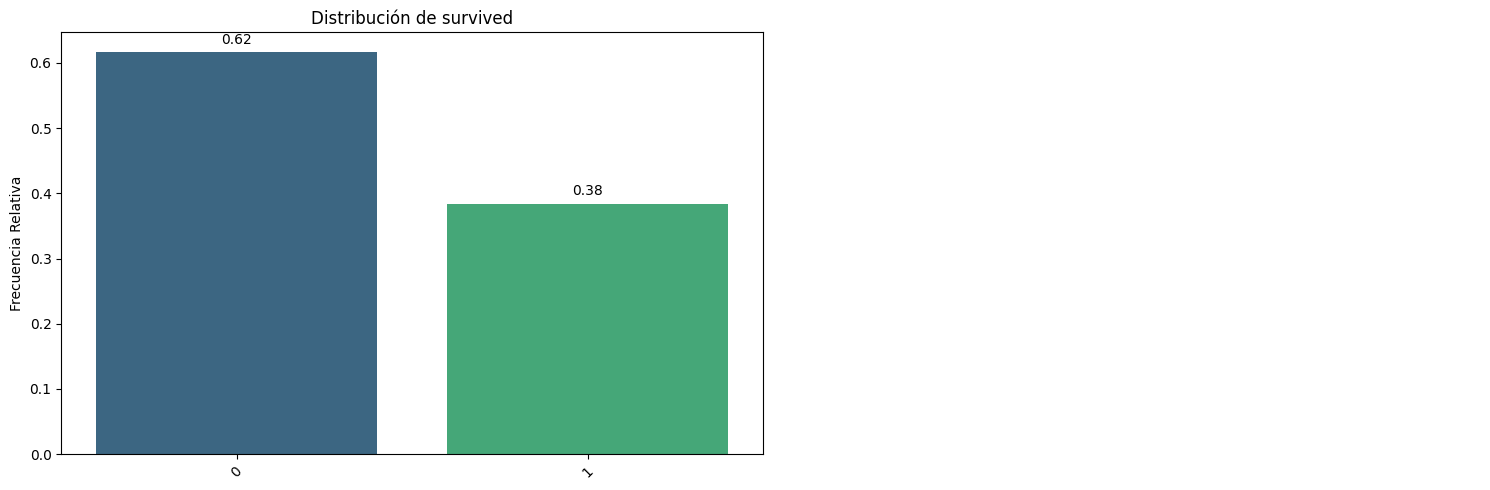

c:\Users\aperez\Desktop\TB\ONLINE_DS_THEBRIDGE_FILES\Sprints\07_Análisis_explicativo_y_descriptivo\Unidad_01\Practica_Obligatoria\bootcampviztools.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


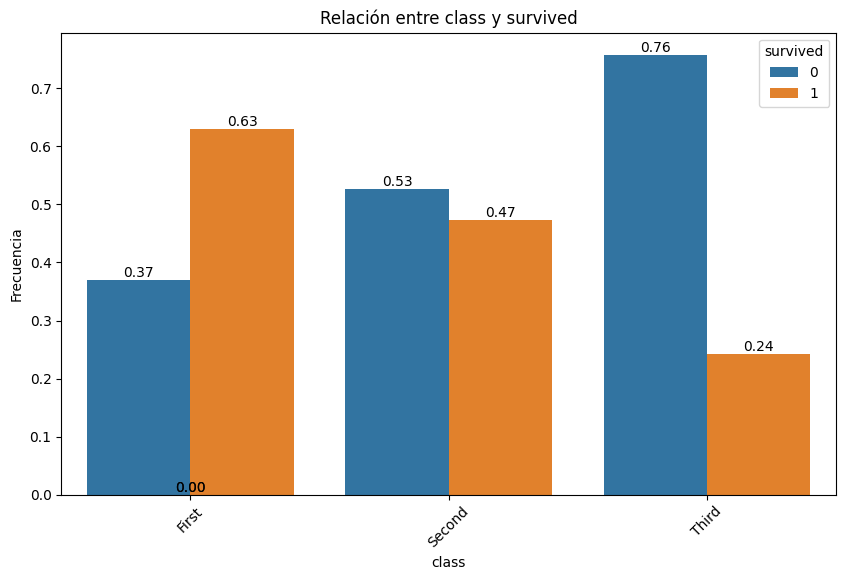

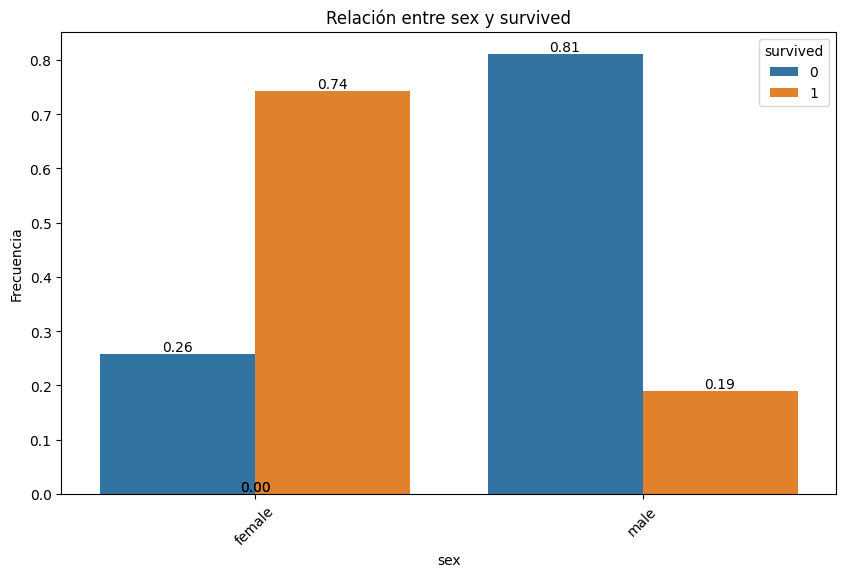

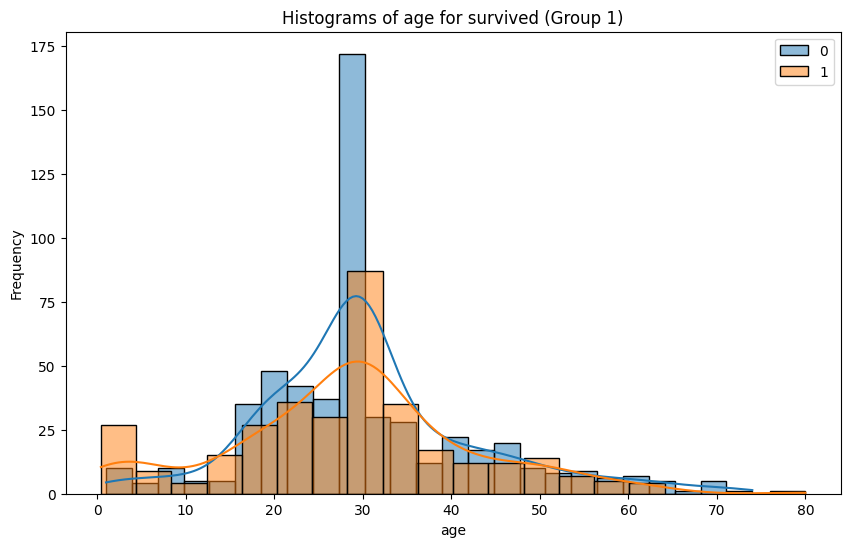

In [9]:
# Distribución de frecuencias absolutas y relativas de la variable "survived"
pinta_distribucion_categoricas(df_titanic, ['survived'], relativa=True, mostrar_valores=True)
# Se ve que el 62% de los pasajeros no sobrevivió y el 38% sí lo hizo

# Vamos a ver si tiene la clase del ticket de cada pasajero influye en la supervivencia:
plot_categorical_relationship_fin(df_titanic, "class", "survived", relative_freq=True, show_values=True)
# Casualidad o no, la clase de ticket sí influyó en la supervivencia de los pasajeros

# Vamos a ver si el sexo de los pasajeros influye en la supervivencia:
plot_categorical_relationship_fin(df_titanic, "sex", "survived", relative_freq=True, show_values=True)
# Al igual que con la clase, el sexo femenino tuvo una mayor tasa de supervivencia

# Vamos a ver si la edad de los pasajeros influye en la supervivencia:
plot_grouped_histograms(df_titanic, "survived", "age", group_size=2)
# Se ve que la edad influyó aunque no de manera tan marcada como la clase o el sexo
# Esto se debe también a la cantidad de pasajeros en cada grupo de edad

- #2.1.2 Who

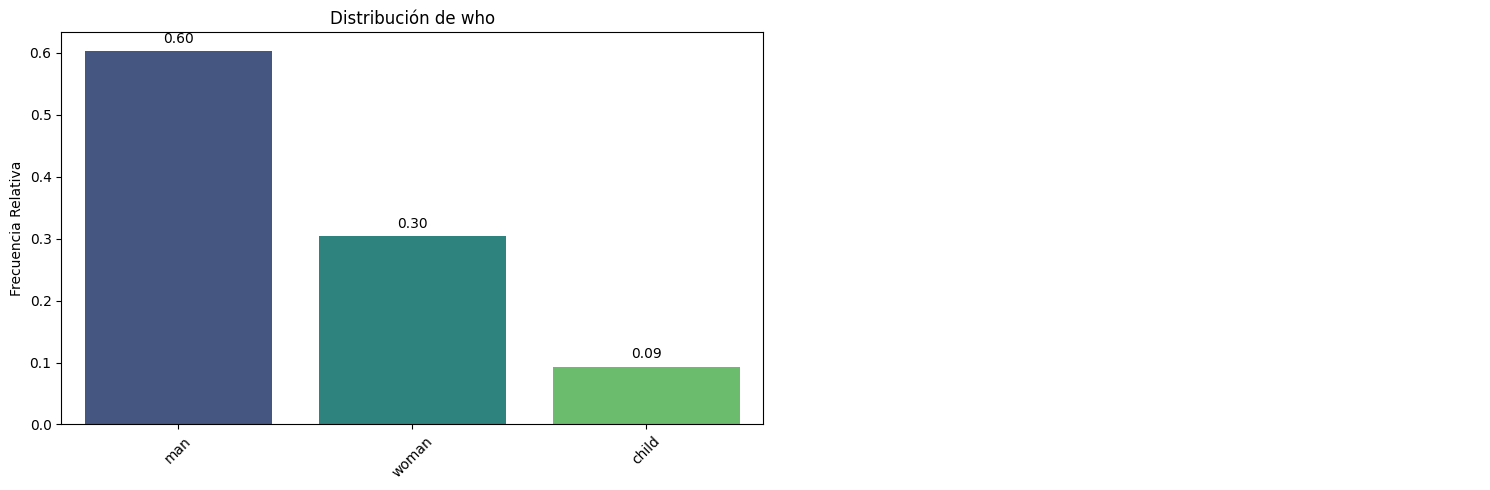

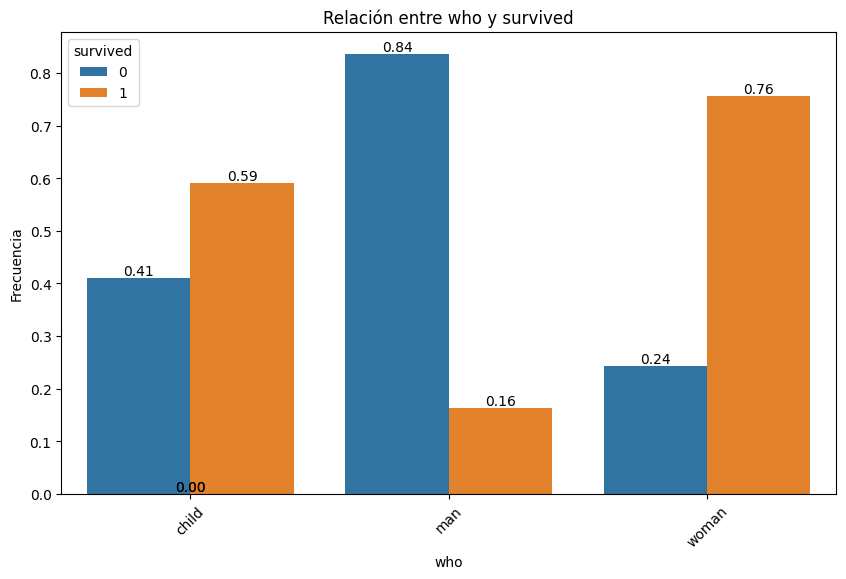

c:\Users\aperez\Desktop\TB\ONLINE_DS_THEBRIDGE_FILES\Sprints\07_Análisis_explicativo_y_descriptivo\Unidad_01\Practica_Obligatoria\bootcampviztools.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


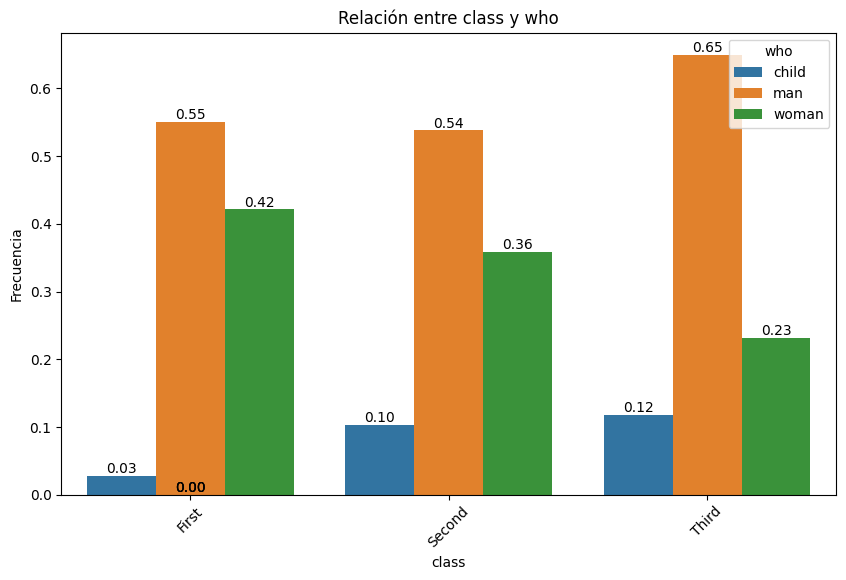

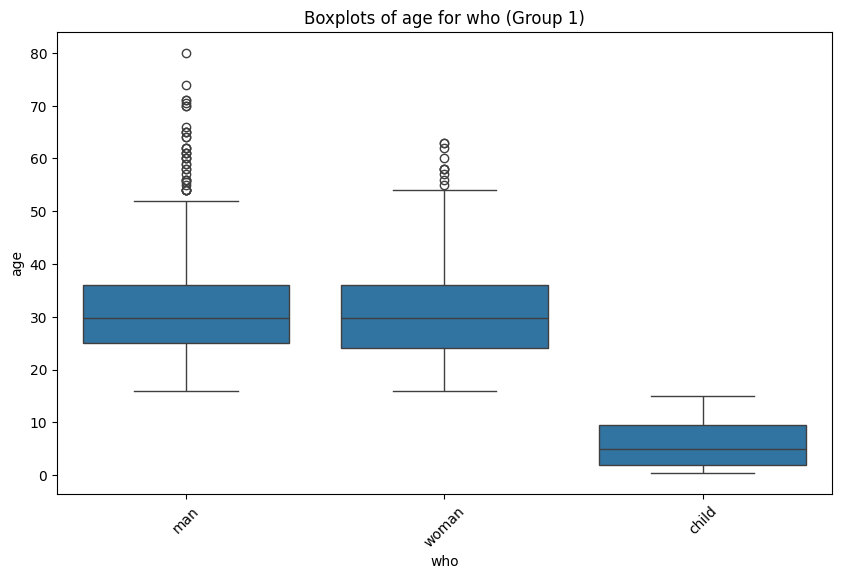

In [10]:
# Distribución de frecuencias absolutas y relativas de la variable "who"
pinta_distribucion_categoricas(df_titanic, ['who'], relativa=True, mostrar_valores=True)
# Se observa que la mayoría de los pasajeros eran hombres, seguidos por mujeres y niños.

# Vamos a ver si el grupo "who" (hombres, mujeres, niños) influye en la supervivencia:
plot_categorical_relationship_fin(df_titanic, "who", "survived", relative_freq=True, show_values=True)
# La relación muestra que las mujeres y los niños tienen una tasa de supervivencia significativamente más alta que los hombres,
# sobre todo el grupo de mujeres. Esto puede reflejar las políticas de evacuación que priorizaban a estos grupos en el Titanic.

# Ahora vamos a ver si la clase del ticket influye en la distribución de "who":
plot_categorical_relationship_fin(df_titanic, "class", "who", relative_freq=True, show_values=True)
# Si se ve que había más hombres viajando en tercera clase aunque en general la distribución de "who" es similar en todas las clases.

# Finalmente, vamos a explorar las distribuciones de edad de cada grupo "who" mediante un boxplot:
plot_grouped_boxplots(df_titanic, "who", "age")
# El boxplot confirma que los niños tienen una edad más baja y su distribución de edad está mucho más concentrada que la de hombres y mujeres.
# Las mujeres y hombres tienen rangos de edad más amplios, pero con una tendencia a tener valores más altos en comparación con los niños.

- #2.1.3 Age

(2,)


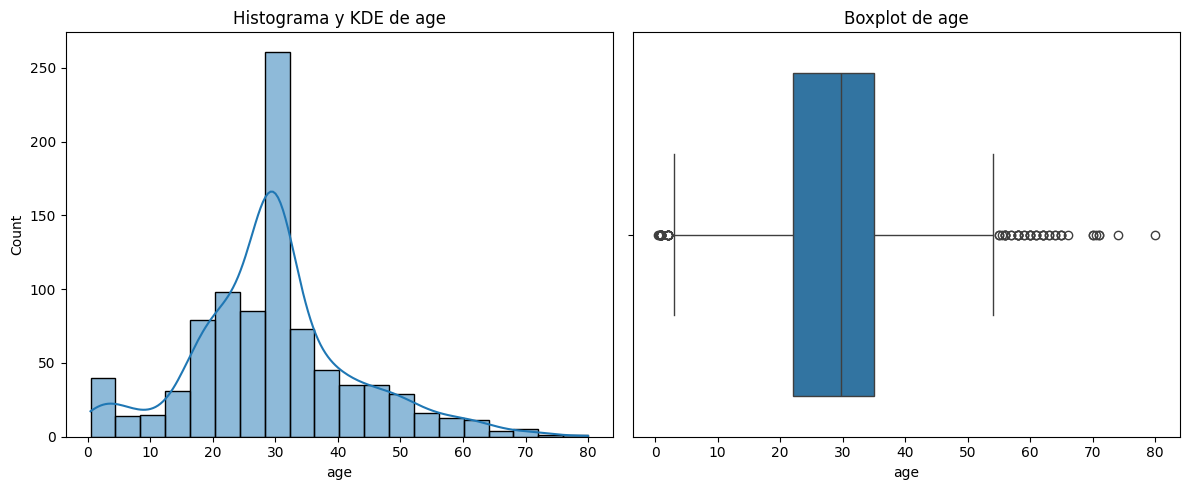

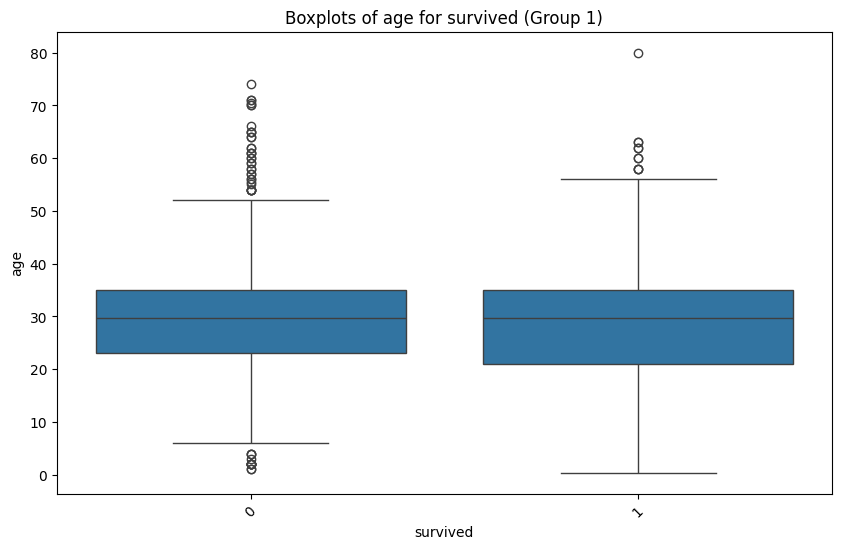

c:\Users\aperez\Desktop\TB\ONLINE_DS_THEBRIDGE_FILES\Sprints\07_Análisis_explicativo_y_descriptivo\Unidad_01\Practica_Obligatoria\bootcampviztools.py:108: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].mean()


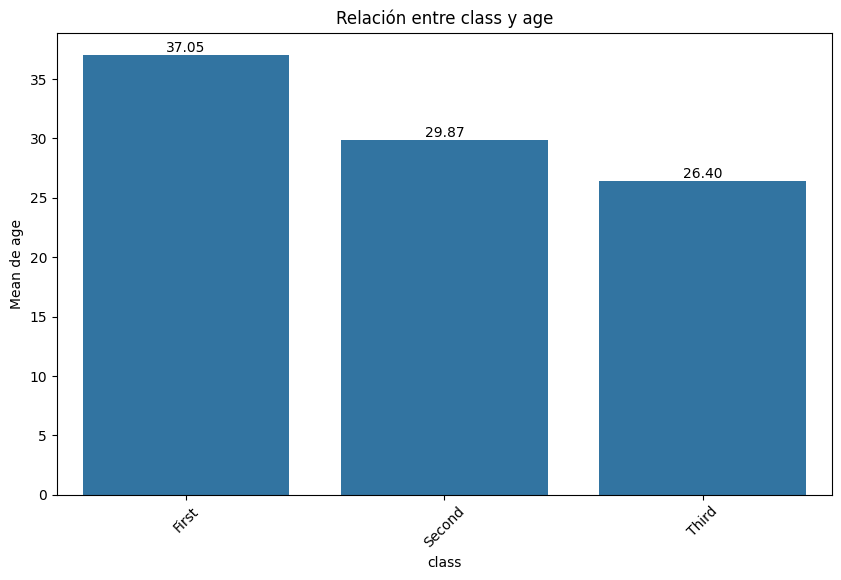

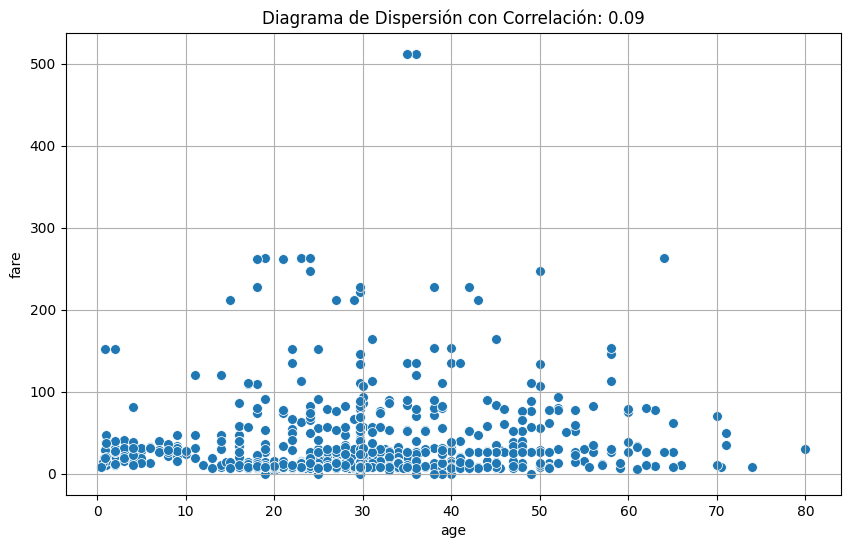

In [11]:
# Vamos a ver la distribución de la variable "age" mediante un histograma y Boxplot:
plot_combined_graphs(df_titanic, ['age'], whisker_width=1.5, bins=20)
# Este gráfico nos muestra la distribución de la edad de los pasajeros, donde podemos ver que la mayoría son adultos jóvenes,
# con una menor representación de personas muy jóvenes o mayores.

# Ahora vamos a ver la relación entre "age" y la supervivencia utilizando un boxplot:
plot_grouped_boxplots(df_titanic, "survived", "age")
# El boxplot muestra que los sobrevivientes tienen una edad promedio más baja en comparación con los no sobrevivientes,
# y que los niños tienen una tendencia a sobrevivir más que los adultos.

# Ahora analizamos la relación entre "age" y "class" usando un gráfico de barras:
plot_categorical_numerical_relationship(df_titanic, "class", "age", show_values=True, measure='mean')
# El gráfico muestra que la edad promedio de los pasajeros es más alta en primera clase, seguido de segunda y tercera clase.

# Finalmente, vamos a ver la correlación entre "age" y "fare" mediante un gráfico de dispersión:
grafico_dispersion_con_correlacion(df_titanic, "age", "fare", tamano_puntos=50, mostrar_correlacion=True)
# El gráfico muestra una correlación baja-moderada entre la edad y el precio del billete

- #2.1.4 Class

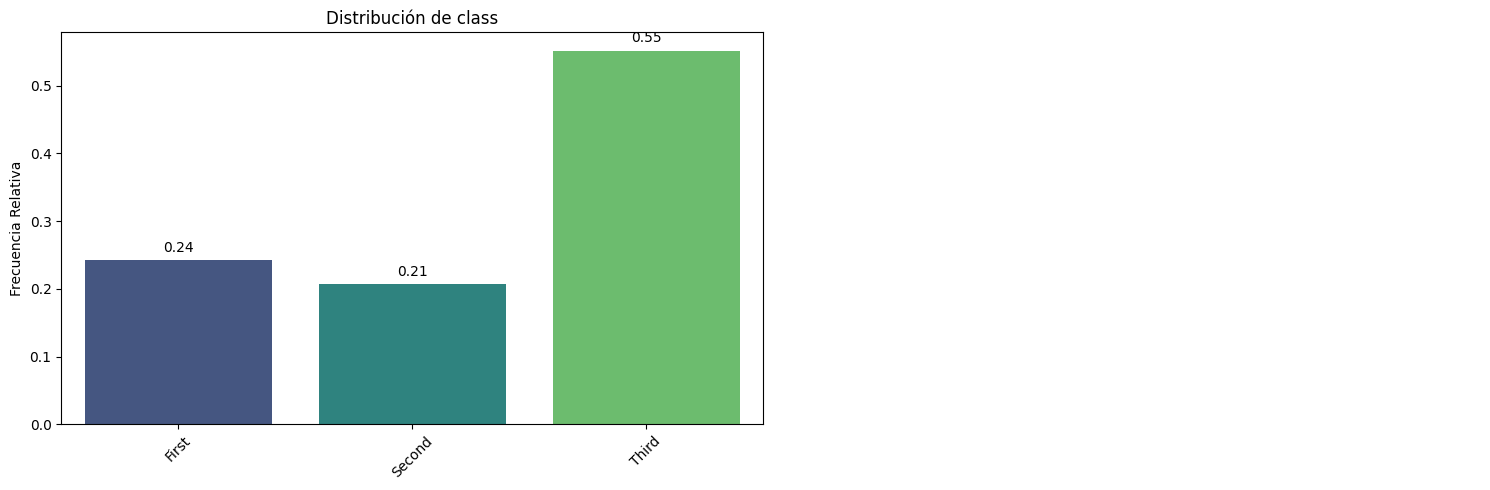

In [12]:
# Vamos a ver la distribución de la variable "class" mediante un gráfico de barras:
pinta_distribucion_categoricas(df_titanic, ['class'], relativa=True, mostrar_valores=True)
# Este gráfico muestra cuántos pasajeros había en cada clase. Como podemos ver, la mayoría de los pasajeros estaban en tercera clase (55%), 
# seguida de primera clase (24%), y menos en segunda clase (21%).
# Refleja que habia mucha diferencia en los bolsillos de los pasajeros. Optando por la clase más barata o por la más cara,
# dejando más de lado la intermedia.

# La relación entre la clase y la supervivencia, la clase y la edad y la clase y el precio del billete,
# ya han sido analizadas anteriormente, por lo que no se repetirán aquí.

- #2.1.5 Embarked

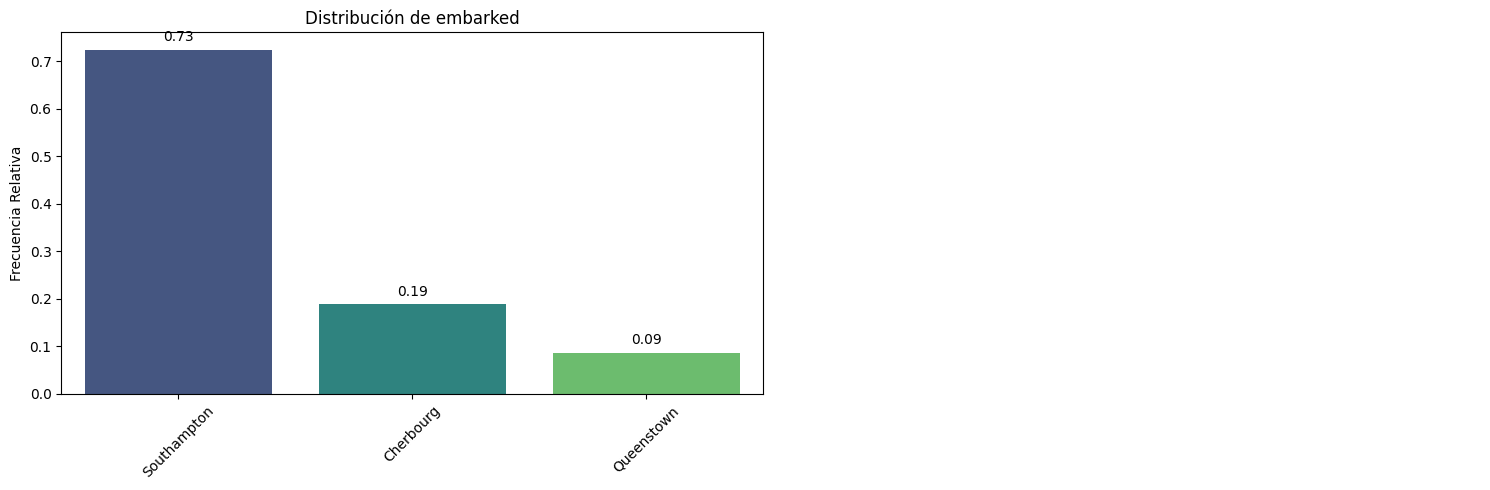

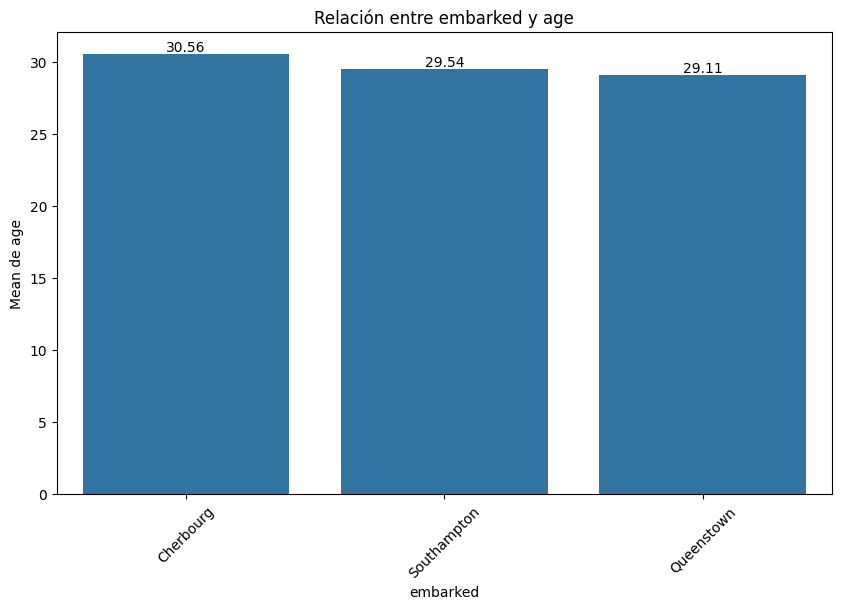

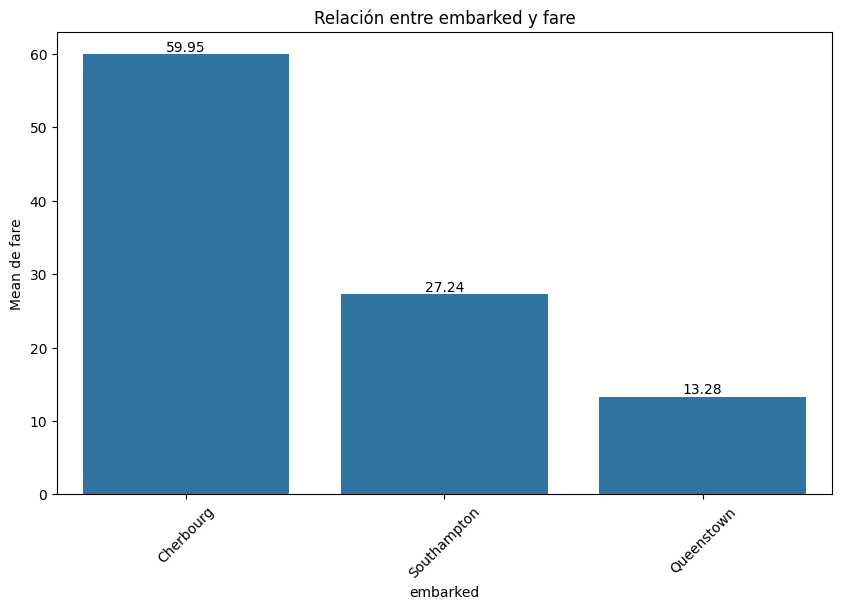

In [13]:
# Vamos a ver la distribución de la variable "embarked" mediante un gráfico de barras:
pinta_distribucion_categoricas(df_titanic, ['embarked'], relativa=True, mostrar_valores=True)
# Este gráfico muestra la proporción de pasajeros que embarcaron en cada puerto. 
# Como podemos ver, la mayoría de los pasajeros embarcaron en Southampton (73%), seguido de Cherburgo (19%), y menos en Queenstown (9%).

# La relación entre el puerto de embarque y la supervivencia ya ha sido analizada anteriormente, por lo que no se repetirá aquí.
# Vamos a ver la relación entre "embarked" y la edad utilizando un gráfico de barras:
plot_categorical_numerical_relationship(df_titanic, "embarked", "age", show_values=True, measure='mean')
# El gráfico muestra que que en todos los orígenes, la media de edad era muy similar.

# Ahora vamos a ver la relación entre "embarked" y el precio del billete utilizando un gráfico de barras:
plot_categorical_numerical_relationship(df_titanic, "embarked", "fare", show_values=True, measure='mean')
# El gráfico muestra que los pasajeros que embarcaron en Cherburgo (C) pagaron un precio promedio más alto por el billete, 
# seguido de Southampton (S) y Queenstown (Q), que pagaron menos.

- #2.1.5 Alone

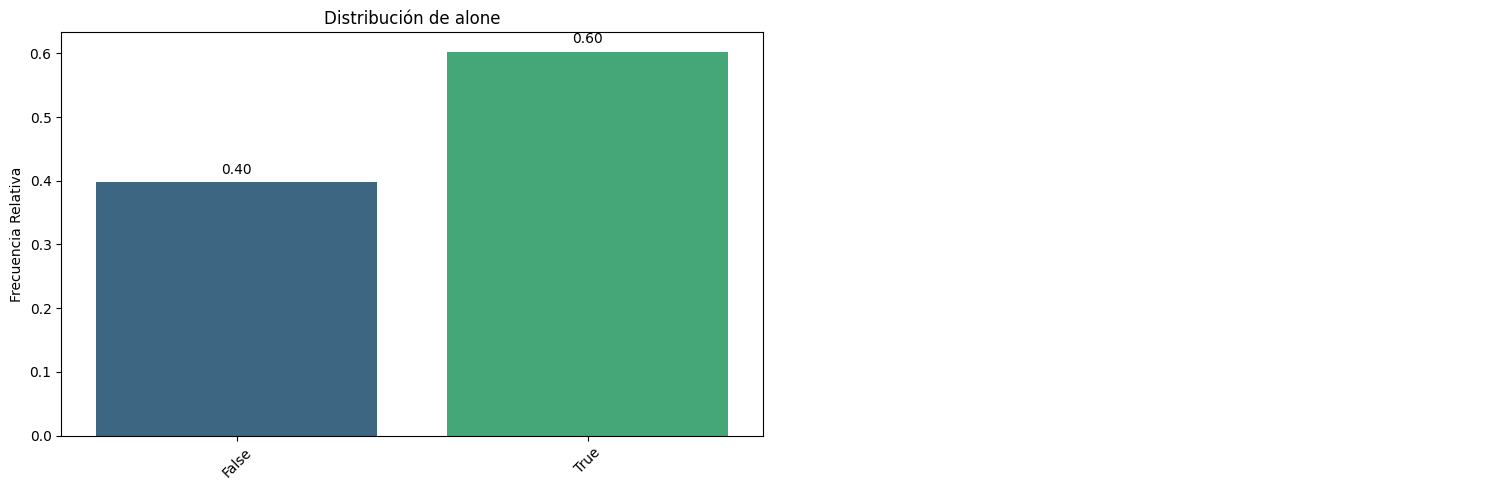

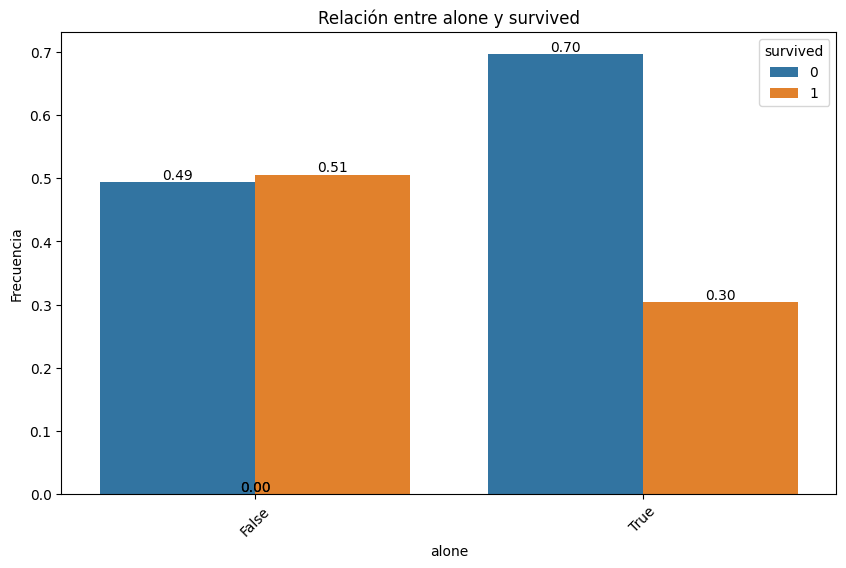

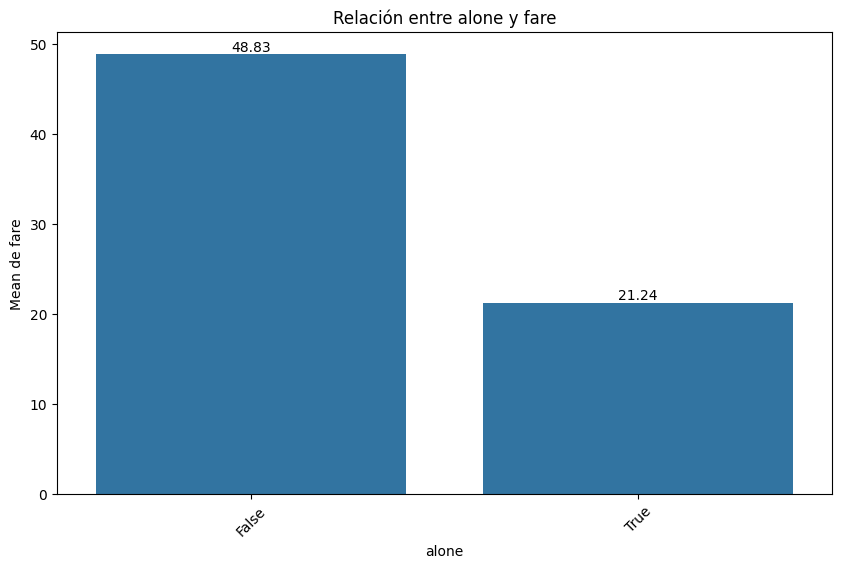

In [14]:
# Vamos a ver la distribución de la variable "alone" mediante un gráfico de barras:
pinta_distribucion_categoricas(df_titanic, ['alone'], relativa=True, mostrar_valores=True)
# Este gráfico muestra la proporción de pasajeros que viajaban solos. 
# Como podemos ver, la mayoría de los pasajeros viajaban solos (60%), mientras que un 40% viajaban acompañados.

# La relación entre el hecho de viajar solo y la supervivencia:
plot_categorical_relationship_fin(df_titanic, "alone", "survived", relative_freq=True, show_values=True)
# El resultado muestra que los pasajeros que viajaban solos tuvieron una tasa de supervivencia menor que los que viajaban acompañados,
# estos habiendo sobrevivido de forma casi equitativa.

# Ahora vamos a ver la relación entre "alone" y el precio del billete utilizando un gráfico de barras:
plot_categorical_numerical_relationship(df_titanic, "alone", "fare", show_values=True, measure='mean')
# El gráfico muestra que los pasajeros que viajaban solos tendieron a pagar tarifas más bajas en promedio que los que viajaban acompañados.

### #2.2 Numéricas

- #2.2.1 Fare

(2,)


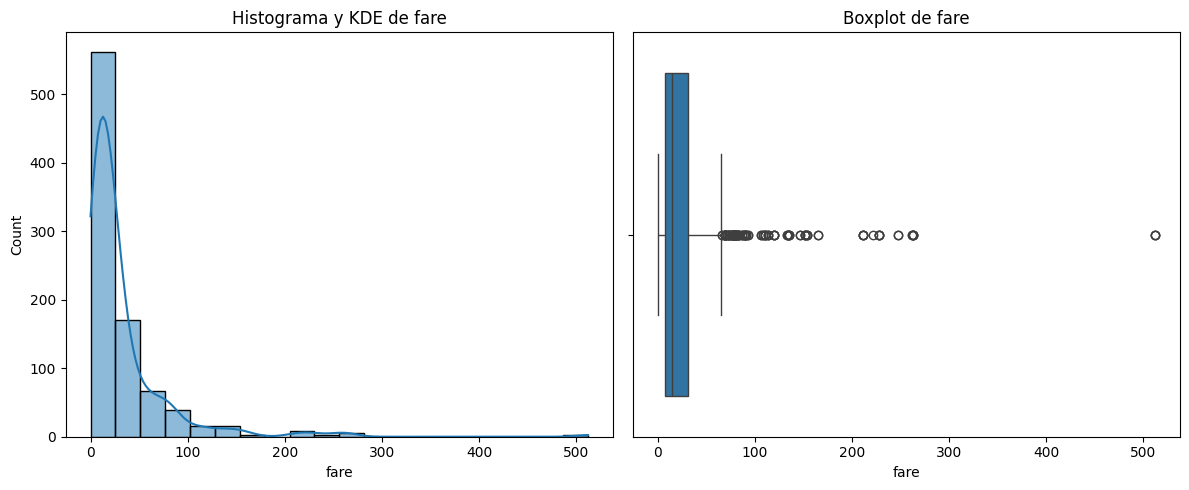

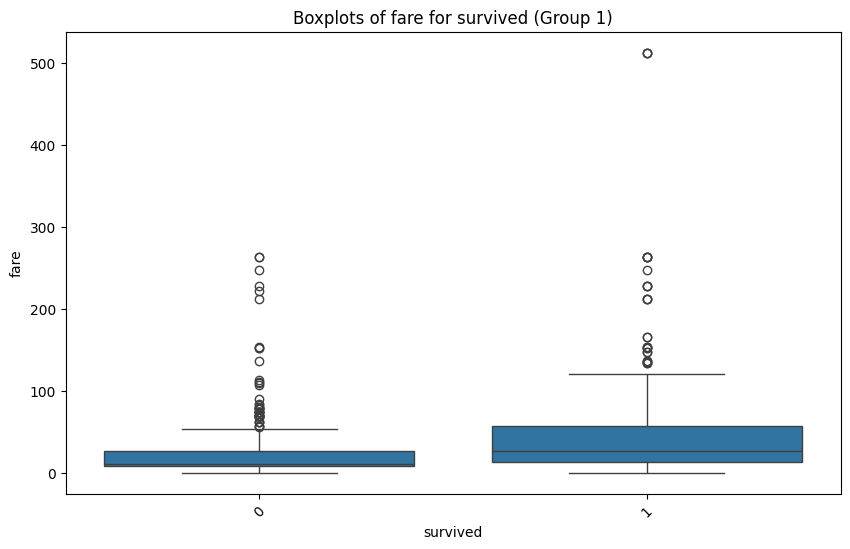

c:\Users\aperez\Desktop\TB\ONLINE_DS_THEBRIDGE_FILES\Sprints\07_Análisis_explicativo_y_descriptivo\Unidad_01\Practica_Obligatoria\bootcampviztools.py:108: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].mean()


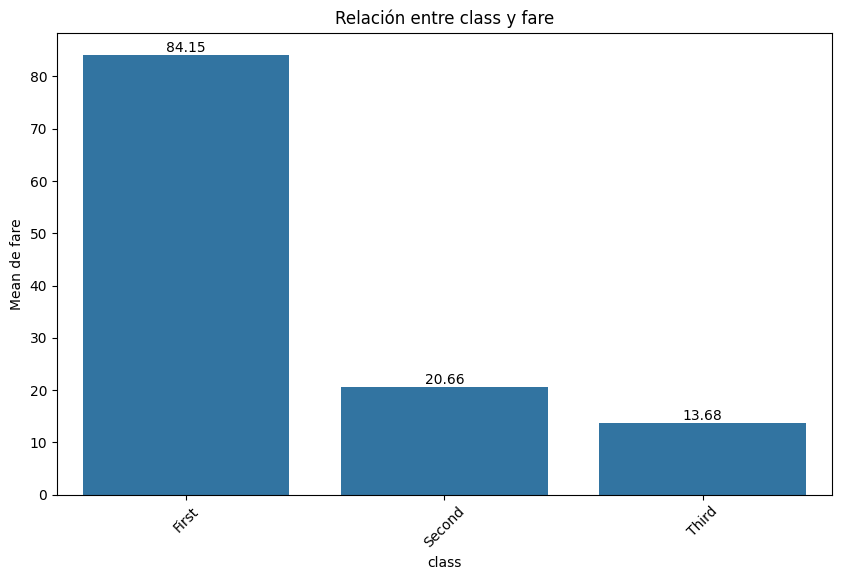

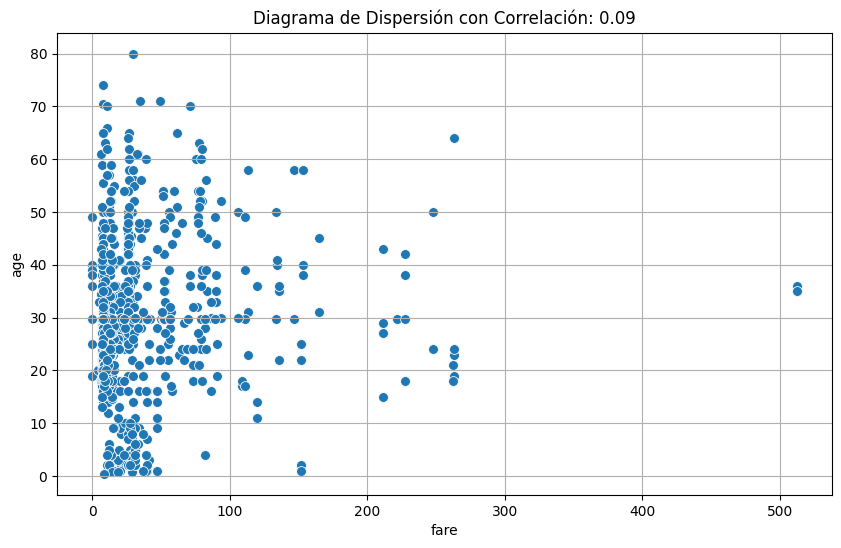

In [15]:
# Vamos a ver la distribución de la variable "fare" mediante un histograma y un Boxplot:
# Este gráfico nos muestra cómo se distribuyen los precios de los boletos de los pasajeros. 
plot_combined_graphs(df_titanic, ['fare'], whisker_width=1.5, bins=20)
# Como podemos ver, la gran mayoría pagaron tarifas bajas, mientras unos pocos pasajeros pagaron precios muy altos.

# Ahora vamos a ver la relación entre "fare" y la supervivencia utilizando un boxplot:
plot_grouped_boxplots(df_titanic, "survived", "fare")
# El boxplot muestra que los sobrevivientes tienden a haber pagado tarifas más bajas en comparación con los no sobrevivientes,
# lo cual podría reflejar el perfil socioeconómico de los pasajeros.

# Ahora analizamos la relación entre "fare" y "class" usando un gráfico de barras:
plot_categorical_numerical_relationship(df_titanic, "class", "fare", show_values=True, measure='mean')
# El gráfico muestra que los pasajeros de primera clase pagaron más que los de segunda y tercera clase.

# Finalmente, vamos a ver la correlación entre "fare" y "age" mediante un gráfico de dispersión:
grafico_dispersion_con_correlacion(df_titanic, "fare", "age", tamano_puntos=50, mostrar_correlacion=True)
# El gráfico muestra una correlación baja entre la tarifa y la edad, indicando que el precio del boleto no depende fuertemente de la edad.

# 👋